In [1]:
from re import X
from turtle import tilt
from xml.etree.ElementPath import prepare_child
from xml.sax import default_parser_list
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
import my_stopwords
import nltk
import matplotlib as mpl
import numpy as np

import keras
import tensorflow as tf

from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display
from sklearn.metrics import classification_report

from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download("wordnet")

import re

KeyboardInterrupt: 

In [ ]:
features = 100

# Hyperparameters
epochs = 20
batch_size = 64

In [ ]:
FILENAME_LABEL = "pitt-dataset.csv"
FILENAME_DATA = "tfidf-train.csv"

In [ ]:
print(f"Reading {FILENAME_DATA}...", end="")
df_data = pd.read_csv(FILENAME_DATA)
print(f"({len(df_data)})")
print(f"Reading {FILENAME_LABEL}...", end="")
df_label = pd.read_csv(FILENAME_LABEL)
print(f"({len(df_label)})")

display(df_label.head(10))

# Put together the label and the training
print("Merging...")
df_mer = pd.concat([df_label["code"], df_data], axis=1)
# Shuffle the dataset
print("Shuffling...")
df_mer = shuffle(df_mer)

display(df_mer.head(10))

Reading tfidf-train.csv...(93422)
Reading pitt-dataset.csv...(93422)


,raw_report,report_num,type_patient,type_report,chief_comp,code,rel_codes,year,body,tok_body
0,0|NEUROSURG OP|OP|POST LAMINECTOMY SYNDROME|72...,0,NEUROSURG OP,OP,POST LAMINECTOMY SYNDROME,724.5,"724.5,424.0,787.01,E935.2,E849.7,",2007,[Report de-identified (Safe-harbor compliant) ...,account md assistants none attending physici...
1,1|NEUROSURG DISCHARGE|DS|POST LAMINECTOMY SYND...,1,NEUROSURG DISCHARGE,DS,POST LAMINECTOMY SYNDROME,724.5,"724.5,424.0,787.01,E935.2,E849.7,",2007,[Report de-identified (Safe-harbor compliant) ...,account admission date discharge date prin...
2,"2|CONSULT|HP|C DIFF HYPOTENSION|458.9|584.9,4...",2,CONSULT,HP,C DIFF HYPOTENSION,458.9,"584.9,486,008.45,599.0,276.51,263.9,458.9,414....",2007,[Report de-identified (Safe-harbor compliant) ...,acct date dict attend mr is a distant sm...
3,3|ADMISSION|HP|C DIFF HYPOTENSION|458.9|584.9...,3,ADMISSION,HP,C DIFF HYPOTENSION,458.9,"584.9,486,008.45,599.0,276.51,263.9,458.9,414....",2007,[Report de-identified (Safe-harbor compliant) ...,acct dict attend reason for admission c d...
4,"4|CT|RAD|C DIFF HYPOTENSION|458.9|584.9,486,0...",4,CT,RAD,C DIFF HYPOTENSION,458.9,"584.9,486,008.45,599.0,276.51,263.9,458.9,414....",2007,[Report de-identified (Safe-harbor compliant) ...,examination performed ct thorax without contra...
5,"5|CONSULT|HP|C DIFF HYPOTENSION|458.9|584.9,4...",5,CONSULT,HP,C DIFF HYPOTENSION,458.9,"584.9,486,008.45,599.0,276.51,263.9,458.9,414....",2007,[Report de-identified (Safe-harbor compliant) ...,acct date dict attend physical medicine a...
6,"6|CLAVIC|RAD|C DIFF HYPOTENSION|458.9|584.9,4...",6,CLAVIC,RAD,C DIFF HYPOTENSION,458.9,"584.9,486,008.45,599.0,276.51,263.9,458.9,414....",2007,[Report de-identified (Safe-harbor compliant) ...,examination performed xray clavical left hou...
7,7|DISCHARGE|DS|C DIFF HYPOTENSION|458.9|584.9...,7,DISCHARGE,DS,C DIFF HYPOTENSION,458.9,"584.9,486,008.45,599.0,276.51,263.9,458.9,414....",2007,[Report de-identified (Safe-harbor compliant) ...,acct discharged dict attend final diagnos...
8,"8|TOE|RAD|POSSIBLE BROKEN FOOT|780.99|838.06,E...",8,TOE,RAD,POSSIBLE BROKEN FOOT,780.99,"838.06,E917.0,",2007,[Report de-identified (Safe-harbor compliant) ...,examination performed xray toes left hours ...
9,"9|FOOT|RAD|POSSIBLE BROKEN FOOT|780.99|838.06,...",9,FOOT,RAD,POSSIBLE BROKEN FOOT,780.99,"838.06,E917.0,",2007,[Report de-identified (Safe-harbor compliant) ...,examination performed xray foot minimum views...


Merging...
Shuffling...


,code,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
85194,729.5,0.000000,0.0,0.0,0.000000,0.0,0.0,0.140192,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.186249,0.000000,0.00000,0.000000,0.000000,0.181919
90953,518.81,0.000000,0.0,0.0,0.000000,0.0,0.0,0.139485,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
22916,722.10,0.000000,0.0,0.0,0.000000,0.0,0.0,0.211763,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.281334,0.000000,0.00000,0.000000,0.000000,0.000000
58981,959.8,0.000000,0.0,0.0,0.000000,0.0,0.0,0.149356,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.188222,0.000000
75239,728.9,0.000000,0.0,0.0,0.116574,0.0,0.0,0.000000,0.000000,0.154359,...,0.116931,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.121495
92272,996.77,0.000000,0.0,0.0,0.000000,0.0,0.0,0.049085,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.059892,0.00000,0.516944,0.000000,0.000000
78129,959.01,0.000000,0.0,0.0,0.367768,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.21967,0.000000,0.000000,0.000000
83005,436,0.000000,0.0,0.0,0.000000,0.0,0.0,0.130556,0.000000,0.000000,...,0.000000,0.0,0.436409,0.0,0.173447,0.000000,0.00000,0.000000,0.000000,0.000000
93155,719.45,0.043326,0.0,0.0,0.139282,0.0,0.0,0.000000,0.054024,0.061476,...,0.186278,0.0,0.000000,0.0,0.000000,0.045498,0.00000,0.000000,0.000000,0.048387
61106,428.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.129448,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.343953,0.000000,0.00000,0.000000,0.000000,0.167978


In [ ]:
print("Slicing DataFrame...")
common_labels = ["786.09", "414.01", "729.5"]
# print(common_labels)
df = df_mer.loc[df_mer["code"].isin(common_labels)]
encode = preprocessing.LabelEncoder()
encode.fit(df["code"])
df["code_t"] = encode.transform(df["code"])

print("Common codes...")
display(df_mer["code"].value_counts().head(10))

print("Target codes...")
display(common_labels)

Slicing DataFrame...
Common codes...


C:\Users\ivana\AppData\Local\Temp\ipykernel_16600\4047557060.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["code_t"] = encode.transform(df["code"])


780.99    5337
786.50    4907
789.00    3954
786.05    3644
959.8     3589
486       1732
428.0     1690
729.5     1324
414.01    1314
786.09    1214
Name: code, dtype: int64

Target codes...


['786.09', '414.01', '729.5']

In [ ]:
print(df.head(10))
print(df.shape)

         code         0         1         2         3         4         5  \
73427  414.01  0.074614  0.000000  0.000000  0.039978  0.000000  0.047712   
81559  414.01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
930    414.01  0.041894  0.000000  0.000000  0.000000  0.000000  0.000000   
67977  786.09  0.069808  0.085563  0.082627  0.299222  0.000000  0.000000   
85247  414.01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9989   414.01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8279    729.5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14426  414.01  0.079507  0.000000  0.094107  0.085199  0.047229  0.050841   
40960   729.5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
53123  414.01  0.000000  0.102645  0.000000  0.000000  0.000000  0.000000   

              6         7         8  ...        91   92        93        94  \
73427  0.000000  0.046519  0.264678  ...  0.000000  0.0  0.000000  0.0000

In [ ]:
test_split = 0.2
test_size = int(len(df)*test_split)
val_split = 0.1
val_size = int(len(df)*val_split)

df_train = df[:test_size]
df_test = df[test_size:]
df_val = df_train[:val_size]
df_train = df_train[val_size:]

x_train = df_train[[ str(i) for i in range(features) ]].astype(float)
y_train = df_train["code_t"]

x_test = df_test[[ str(i) for i in range(features) ]].astype(float)
y_test = df_test["code_t"]

x_val = df_val[[ str(i) for i in range(features) ]].astype(float)
y_val = df_val["code_t"]

print(x_train.head(10))

print("Data shape")
print(f"    - x_train shape: {x_train.shape}")
print(f"    - y_train shape: {y_train.shape}")
print(f"    - x_test shape: {x_test.shape}")
print(f"    - y_test shape: {y_test.shape}")

Get data...
              0         1         2         3         4         5         6  \
14771  0.072484  0.000000  0.000000  0.155345  0.258344  0.092699  0.000000   
92364  0.000000  0.000000  0.083175  0.000000  0.000000  0.000000  0.000000   
87654  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.125460   
41776  0.144483  0.000000  0.000000  0.000000  0.171655  0.000000  0.000000   
73742  0.000000  0.000000  0.000000  0.000000  0.000000  0.593781  0.000000   
41065  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
81757  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.168543   
28148  0.000000  0.000000  0.000000  0.000000  0.000000  0.239623  0.000000   
30509  0.243918  0.597935  0.000000  0.000000  0.000000  0.000000  0.104965   
66532  0.000000  0.000000  0.000000  0.131715  0.000000  0.000000  0.000000   

              7         8         9  ...        90        91        92  \
14771  0.000000  0.000000  0.000000  ...  0.

In [ ]:
x_in = keras.layers.Input(shape=(features))
x = keras.layers.Dense(4096, activation="relu", name="dense_1")(x_in)
x = keras.layers.Dense(2048, activation="relu", name="dense_2")(x)
x = keras.layers.Dense(2048, activation="relu", name="dense_3")(x)
x = keras.layers.Dense(1024, activation="relu", name="dense_4")(x)
x = keras.layers.Dense(1024, activation="relu", name="dense_5")(x)
x = keras.layers.Dense(512, activation="relu", name="dense_6")(x)
x_out = keras.layers.Dense(len(common_labels), activation="softmax", name="softmax")(x)

In [ ]:
model = keras.Model(inputs=x_in, outputs=x_out)

model.compile(
    optimizer = 'adam',
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [ keras.metrics.SparseCategoricalAccuracy() ]
)

model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data=(x_val, y_val)
)

Epoch 1/20
7/7 [==============================] - 2s 249ms/step - loss: 1.0767 - sparse_categorical_accuracy: 0.4078 - val_loss: 1.2222 - val_sparse_categorical_accuracy: 0.4286
Epoch 2/20
7/7 [==============================] - 1s 192ms/step - loss: 0.8886 - sparse_categorical_accuracy: 0.5714 - val_loss: 0.7800 - val_sparse_categorical_accuracy: 0.6675
Epoch 3/20
7/7 [==============================] - 1s 196ms/step - loss: 0.7172 - sparse_categorical_accuracy: 0.7636 - val_loss: 0.7654 - val_sparse_categorical_accuracy: 0.6987
Epoch 4/20
7/7 [==============================] - 1s 189ms/step - loss: 0.5046 - sparse_categorical_accuracy: 0.8130 - val_loss: 0.7577 - val_sparse_categorical_accuracy: 0.7039
Epoch 5/20
7/7 [==============================] - 1s 198ms/step - loss: 0.3232 - sparse_categorical_accuracy: 0.8857 - val_loss: 0.9698 - val_sparse_categorical_accuracy: 0.6961
Epoch 6/20
7/7 [==============================] - 1s 206ms/step - loss: 0.2045 - sparse_categorical_accuracy: 

## Make some predictions

97/97 [==============================] - 3s 29ms/step


<Figure size 1440x720 with 0 Axes>

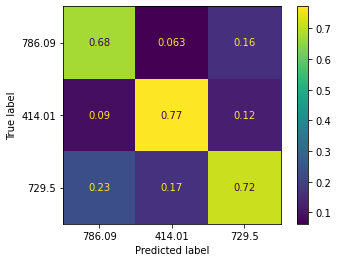

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       948
           1       0.77      0.79      0.78      1023
           2       0.72      0.62      0.66      1111

    accuracy                           0.72      3082
   macro avg       0.72      0.73      0.72      3082
weighted avg       0.72      0.72      0.72      3082



In [ ]:
pred_num = len(x_test)

pred = model.predict(x_test[:pred_num])
pred = np.argmax(pred, axis=1)

fig = plt.figure(figsize=(20, 10))
cm = confusion_matrix(pred, y_test[:pred_num], normalize="pred")
mat = ConfusionMatrixDisplay(cm, display_labels=common_labels)
mat.plot()
plt.show()

report = classification_report(pred, y_test[:pred_num])
print(report)